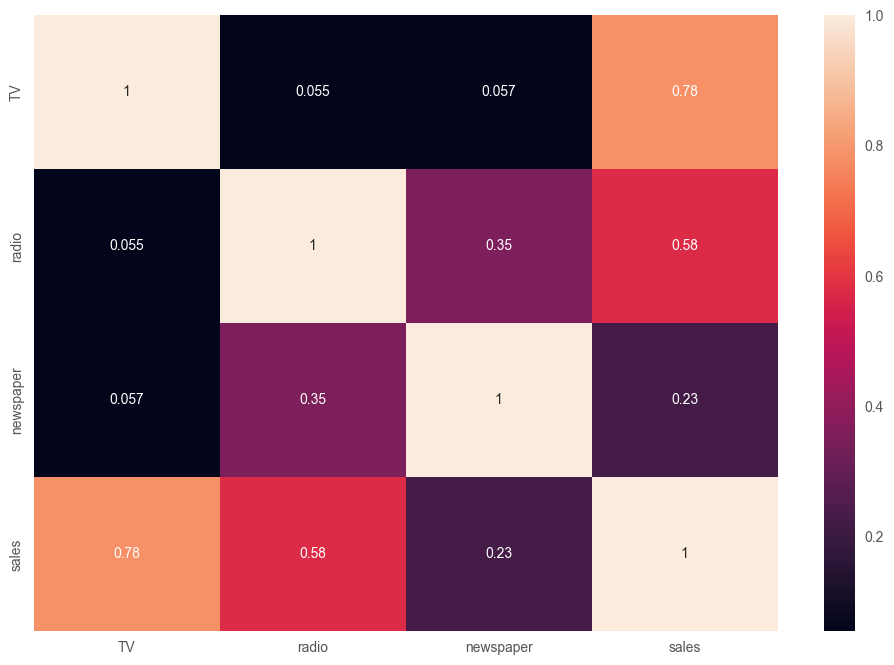

Свободный член -> 11.765576707409682
Коэффициенты модели -> [0.06888299]
[14.36246531 13.94227909 12.27531081 13.23967263 13.83206631]
MSE -> 25.196780034607826


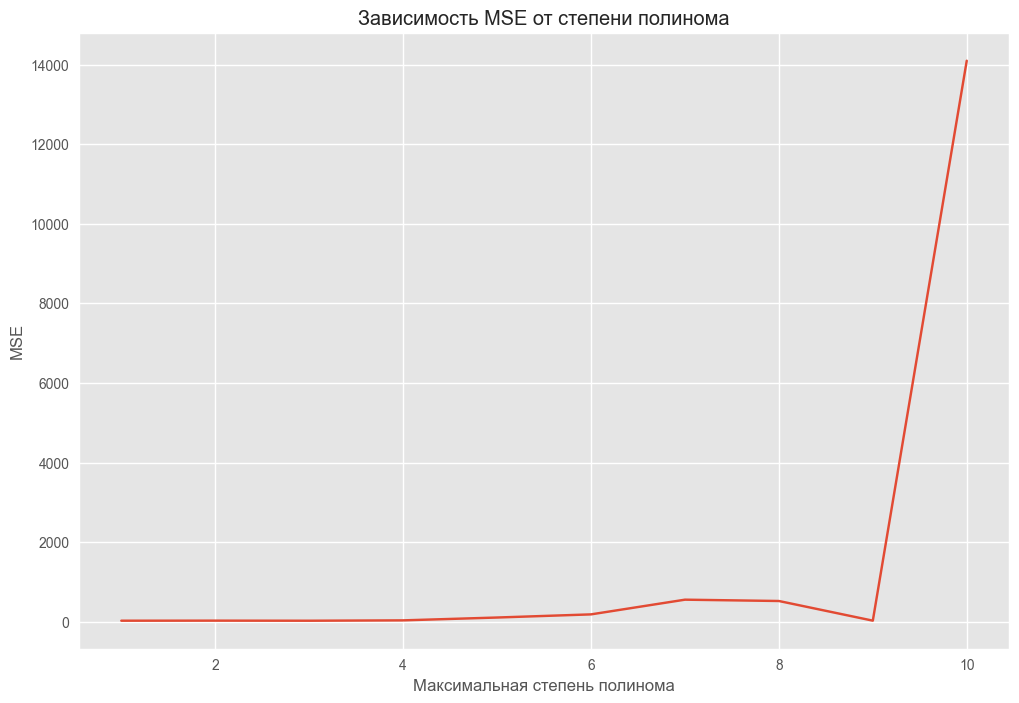

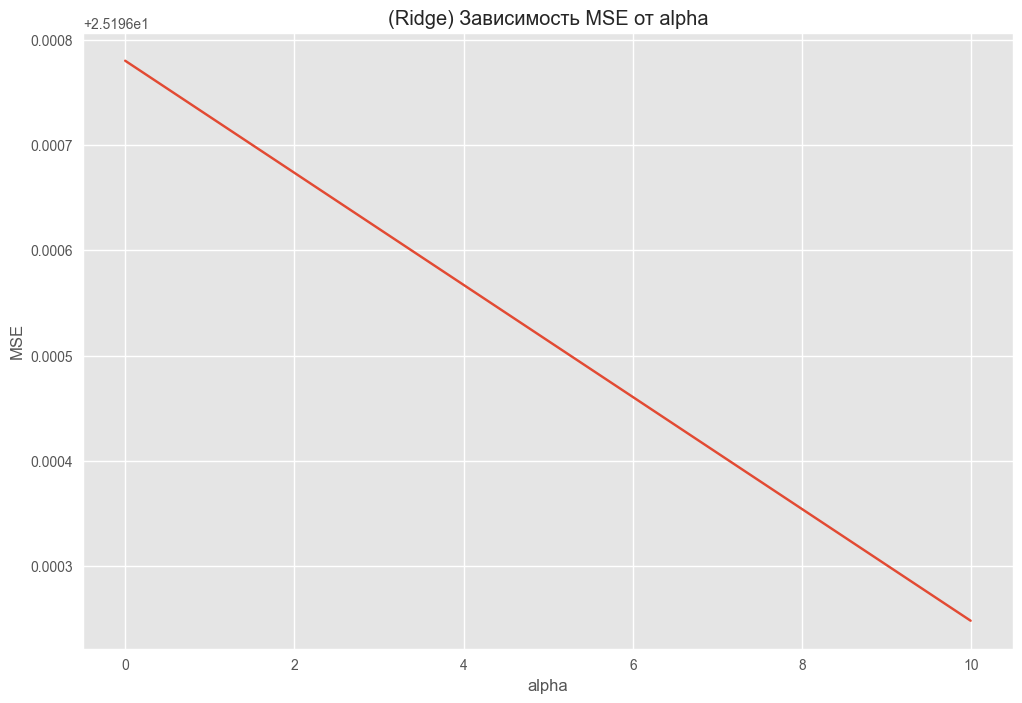

ValueError: x and y must have same first dimension, but have shapes (1000,) and (999,)

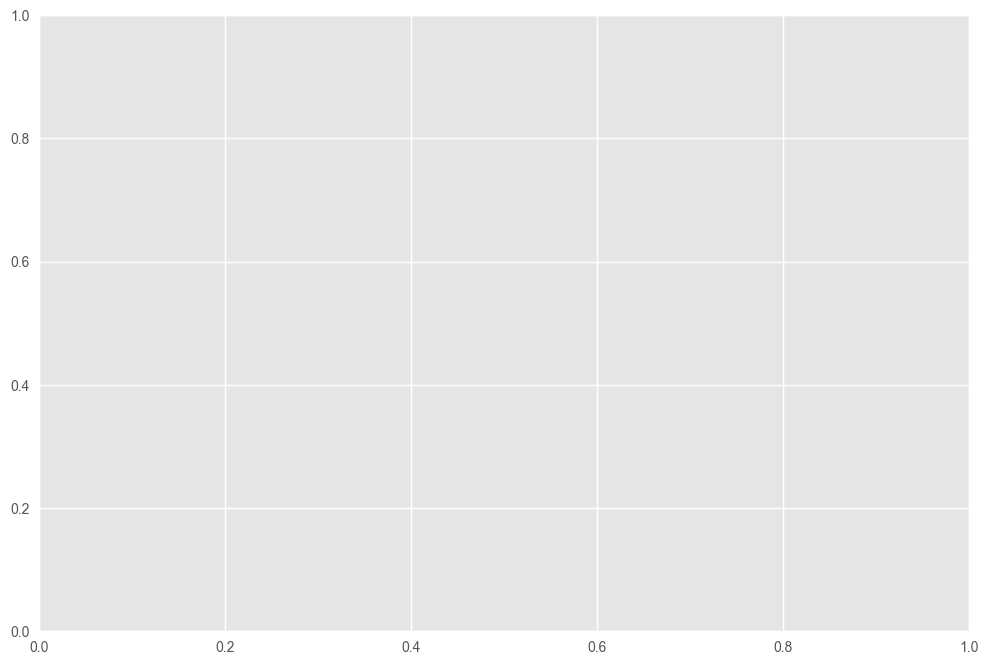

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import maxabs_scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR


plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv("data/Advertising.csv")
df.drop(df.columns[[0]], axis = 1, inplace = True) 
sns.heatmap(df.corr(),annot=True)
plt.show()
X = df[['newspaper']]
y = df.sales
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Свободный член -> {model.intercept_}")
print(f"Коэффициенты модели -> {model.coef_}")
y_pred = model.predict(X_test) 
print(y_pred[:5])

MSE = mean_squared_error(y_test, y_pred)
print(f"MSE -> {MSE}")

mse_values = []

for max_pow in range(1, 11):

    poly_features = PolynomialFeatures(degree=max_pow)
    X_train_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    X_test_poly = poly_features.transform(X_test)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(range(1, 11), mse_values)
plt.xlabel("Максимальная степень полинома")
plt.ylabel("MSE")
plt.title("Зависимость MSE от степени полинома")
plt.show()


mse_values = []

for alpha in np.arange(0, 10, 0.01):

    model = Ridge(alpha= alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)


plt.plot(np.arange(0.01, 10, 0.01), mse_values)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("(Ridge) Зависимость MSE от alpha")
plt.show()


mse_values = []

for alpha in np.arange(0.01, 10, 0.01):

    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)


plt.plot(np.arange(0, 10, 0.01), mse_values)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("(Lasso) Зависимость MSE от alpha")
plt.show()

svr_poly = SVR(kernel='poly', degree=3, C=1.0, gamma='scale')
svr_sigmoid = SVR(kernel='sigmoid', C=1.0, gamma='scale')

svr_poly.fit(X_train, y_train)
svr_sigmoid.fit(X_train, y_train)

y_pred_poly = svr_poly.predict(X_test)
y_pred_sigmoid = svr_sigmoid.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)

print('Полиномиальное ядро:')
print(f'MSE: {mse_poly:.2f}')
print(f'MAE: {mae_poly:.2f}')
print(f'R^2: {r2_poly:.2f}')

print('\nСигмоидное ядро:')
print(f'MSE: {mse_sigmoid:.2f}')
print(f'MAE: {mae_sigmoid:.2f}')
print(f'R^2: {r2_sigmoid:.2f}')

'''
Лучше рассматривать полиномиальное ядро, поэтому дальше только его и рассмотрим.
'''
minimaleValue = 5000
param = []

for degree in range(1, 10):
    for C in np.arange(0.1, 10, 0.1):
        svr_poly = SVR(kernel='poly', degree=degree, C=C, gamma='scale')
        svr_poly.fit(X_train, y_train)
        y_pred_poly = svr_poly.predict(X_test)
        mae_poly = mean_absolute_error(y_test, y_pred_poly)
        if mae_poly < minimaleValue:
            minimaleValue = mae_poly
            param = [degree, C]

print(f"Минимальная ошибка ({minimaleValue}) возникает при параметрах -> degree:{param[0]}, C:{param[1]}")

"""
Для поиска оптимальных значений конечно рекомендуется использовать sklearn.model_selection.GridSearchCV, но так как мы его еще не проходили я решил не использовать его.
"""